# Car Price Prediction with Linear Regression

<font size = 4>Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
from sklearn.metrics import r2_score

In [3]:
cars = pd.read_csv("...\car data.csv")

In [4]:
# gain insights about the data by visualizing first entries
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# shape of the dataframe 
cars.shape

(301, 9)

In [6]:
# getting the information about the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the missing values
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# distribution of the categorical data
print(cars["Car_Name"].value_counts(),"\n")

print(cars["Seller_Type"].value_counts(),"\n")

print(cars["Transmission"].value_counts(),"\n")

print(cars["Fuel_Type"].value_counts(),"\n")

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 



## Encoding the categorical data

<font size = 3>Replace the categorical values of **Fuel Type** with numerical numbers in order to easy implementations
* Petrol : 0
* Diesel : 1
* CNG : 2

In [9]:
# in this example I will use replace() function
cars.replace({"Fuel_Type": {"Petrol":0, "Diesel":1,"CNG":2}},inplace = True)

<font size = 3>Replace the categorical values of **Seller Type** with numerical numbers in order to easy implementations
* Dealer : 0
* Individual : 1

In [10]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [11]:
# replace() function again with different syntax
cars["Seller_Type"].replace(["Dealer","Individual"], [0,1], inplace = True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


<font size = 3>Replace the categorical values of **Transmission** with numerical numbers in order to easy implementations
<font size = 3>This time I will use **get_dummies()** function in order to convert the categorical data to numerical
    
* Transmission_Manual = 1 -> Transmission type is Manual
* Transmission_Manual = 0 -> Transmission type is Automatic

In [12]:
# create the copy of the car dataframe to avoid any wrong data preprocessings
cars_copy = pd.get_dummies(cars,columns = ["Transmission"],drop_first = True)

In [14]:
cars_copy.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


<font size = 3> We don't need Car Name to process, because it will overload our work because there are a lot of categorical data there. Therefore drop it


In [15]:
cars_copy.drop("Car_Name",axis =1 ,inplace = True)

In [16]:
cars_copy.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1
1,2013,4.75,9.54,43000,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1
4,2014,4.60,6.87,42450,1,0,0,1


<font size = 3> Separate the data to (x = Features, Y = target) parts 
* Target = Selling_Price 

In [17]:
y = cars_copy["Selling_Price"]
X = cars_copy.drop("Selling_Price", axis = 1)

<font size = 4> Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

<font size = 4> Model Training 


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

<font size = 4> Prediction on Training Data

In [21]:
preds_train = lr.predict(X_train)

Text(0.5, 1.0, 'Prediction on Training Data')

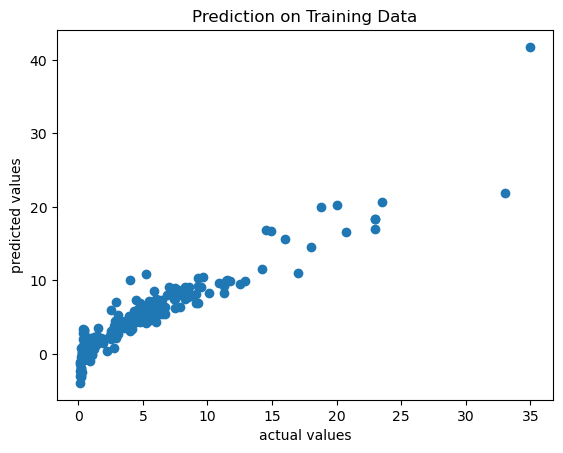

In [35]:
plt.scatter(y_train,preds_train)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("Prediction on Training Data")

<font size = 4> Prediction on Test Data

In [23]:
preds_test = lr.predict(X_test)

Text(0.5, 1.0, 'Prediction on Test Data')

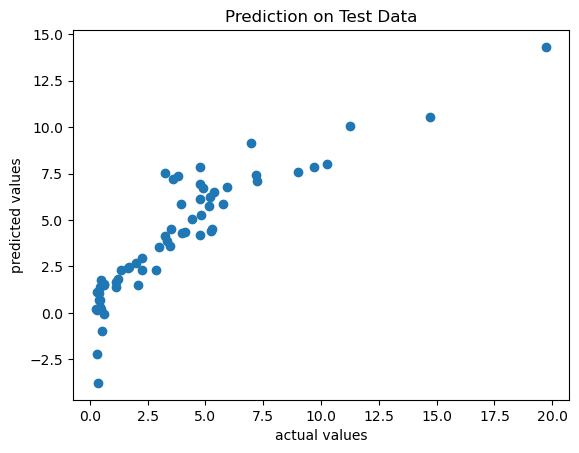

In [40]:
#plt.scatter(y_test,preds_test)
plt.scatter(y_test,preds_test)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("Prediction on Test Data")

<font size = 4> Performance Metrix for Training Data Prediction

In [25]:
perfo_train_mae = mean_absolute_error(y_train,preds_train)
perfo_train_mae

1.1966249406510565

In [26]:
perfo_train_mse = mean_squared_error(y_train,preds_train)
perfo_train_mse

3.210206897702513

<font size = 4> Performance Metrics for Test Data Prediction

In [27]:
perfo_test_mae = mean_absolute_error(y_test,preds_test)
perfo_test_mae

1.2036544318574554

In [28]:
perfo_train_mse = mean_squared_error(y_test,preds_test)
perfo_train_mse

2.880477158201094

<font size = 4 > R2 score for Training Data

In [41]:
r2_train = r2_score(y_train,preds_train)
print("R2 score of the model (Trained data): {}".format(r2_train))

R2 score of the model (Trained data): 0.8879162800043925


<font size = 4> R2 score for Test Data

In [42]:
r2_test = r2_score(y_test,preds_test)
print("R2 score of the model (Test Data): {}".format(r2_test))

R2 score of the model (Test Data): 0.7863250463118902
